<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:MidnightBlue">Celiac Disease Analysis</span> </h1>
<hr>
<h3 style="font-size:22px; text-align:center; margin-bottom:30px;"><span style="color:SlateGray">Xiaomin Xie</h3>`

# IMPORT PACKAGES

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

In [2]:
# interactive visuals
import cufflinks as cf
cf.go_offline()

# EXPLORATORY ANALYSIS

In [27]:
df = pd.read_csv('celiac_disease_lab_data.csv')

In [3]:
df.shape

(2206, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2206 non-null   int64  
 1   Gender            2206 non-null   object 
 2   Diabetes          2206 non-null   object 
 3   Diabetes Type     2206 non-null   object 
 4   Diarrhoea         2206 non-null   object 
 5   Abdominal         2206 non-null   object 
 6   Short_Stature     2206 non-null   object 
 7   Sticky_Stool      2206 non-null   object 
 8   Weight_loss       2206 non-null   object 
 9   IgA               2206 non-null   float64
 10  IgG               2206 non-null   float64
 11  IgM               2206 non-null   float64
 12  Marsh             2206 non-null   object 
 13  cd_type           2206 non-null   object 
 14  Disease_Diagnose  2206 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 258.6+ KB


In [5]:
df.dtypes

Age                   int64
Gender               object
Diabetes             object
Diabetes Type        object
Diarrhoea            object
Abdominal            object
Short_Stature        object
Sticky_Stool         object
Weight_loss          object
IgA                 float64
IgG                 float64
IgM                 float64
Marsh                object
cd_type              object
Disease_Diagnose     object
dtype: object

In [6]:
df.head(10)

,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Marsh,cd_type,Disease_Diagnose
0,10,Male,Yes,Type 1,inflammatory,yes,PSS,no,no,1.30,10.0,1.00,marsh type 0,potential,yes
1,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.50,12.5,1.30,marsh type 3a,atypical,yes
2,8,Female,Yes,Type 1,watery,yes,Variant,yes,yes,0.40,8.0,0.50,marsh type 1,latent,yes
3,10,Male,Yes,Type 1,watery,yes,PSS,no,no,0.98,9.0,0.66,marsh type 3a,silent,yes
4,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.00,10.5,1.10,marsh type 1,latent,yes
5,8,Female,Yes,Type 1,fatty,yes,Variant,yes,yes,1.10,9.5,1.00,marsh type 3a,silent,yes
6,9,Male,Yes,Type 1,watery,yes,Variant,yes,yes,2.10,11.4,1.00,marsh type 2,typical,yes
7,5,Female,Yes,Type 1,fatty,yes,PSS,yes,yes,0.80,12.0,0.98,marsh type 1,latent,yes
8,6,Female,Yes,Type 1,fatty,yes,PSS,yes,yes,1.50,8.0,1.10,marsh type 3b,silent,yes
9,4,Male,Yes,Type 1,watery,yes,Variant,yes,yes,0.42,11.5,1.00,marsh type 2,typical,yes


In [7]:
df.tail(10)

,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Marsh,cd_type,Disease_Diagnose
2196,9,Female,no,None,watery,yes,PSS,yes,no,1.20,9.0,1.00,none,none,no
2197,10,Female,no,None,watery,no,DSS,no,no,1.30,8.0,1.00,none,none,no
2198,6,Male,Yes,Type 1,inflammatory,yes,PSS,yes,yes,0.51,13.4,0.91,marsh type 2,typical,yes
2199,10,Male,Yes,Type 1,fatty,yes,Variant,yes,yes,1.80,13.0,0.80,marsh type 3b,atypical,yes
2200,9,Female,Yes,Type 1,inflammatory,yes,PSS,yes,yes,1.30,9.0,1.10,marsh type 1,latent,no
2201,3,Male,Yes,Type 1,fatty,yes,PSS,yes,no,1.10,7.0,0.60,marsh type 2,typical,yes
2202,11,Female,Yes,Type 1,watery,yes,PSS,yes,no,1.40,12.0,1.10,none,none,no
2203,15,Male,Yes,Type 1,watery,yes,PSS,yes,no,0.34,10.0,0.60,marsh type 0,potential,yes
2204,7,Female,no,None,fatty,yes,DSS,yes,yes,2.10,8.5,2.10,none,none,no
2205,12,Female,Yes,Type 1,inflammatory,yes,Variant,yes,yes,1.90,11.1,1.10,none,none,no


C:\Users\kreci\AppData\Local\Temp\ipykernel_36180\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

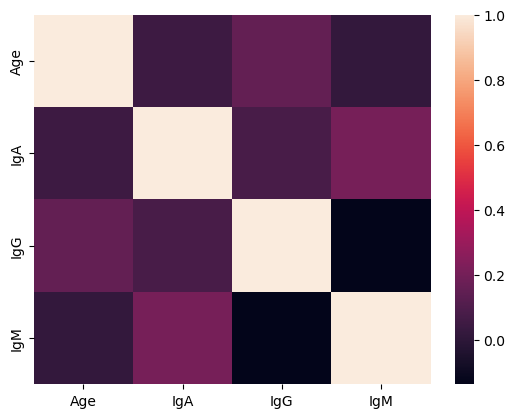

In [8]:
sns.heatmap(df.corr())

In [12]:
df.describe()

,Age,IgA,IgG,IgM
count,2206.000000,2206.000000,2206.000000,2206.000000
mean,12.768812,1.427384,10.052901,1.236963
std,7.434250,1.110042,2.047683,0.447216
min,1.000000,0.340000,5.000000,0.500000
25%,8.000000,1.000000,8.700000,0.980000
50%,10.000000,1.100000,10.000000,1.100000
75%,15.000000,1.800000,12.000000,1.500000
max,35.000000,9.000000,15.300000,2.700000


## Missing Data

<Axes: >

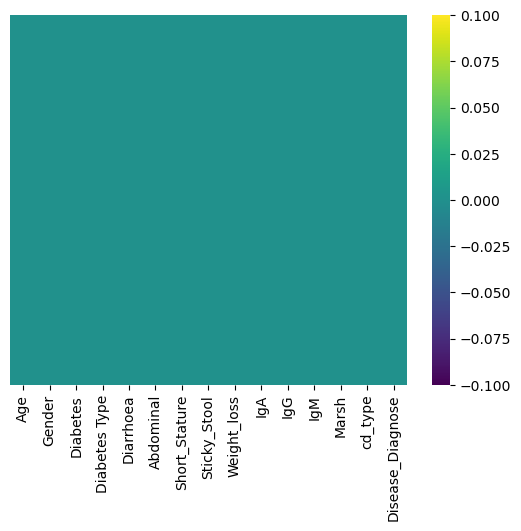

In [47]:
sns.heatmap(df.isnull(), yticklabels=False, cbar='False', cmap='viridis')

In [14]:
df_num = df[['Age', 'IgA', 'IgG', 'IgM', 'Disease_Diagnose']]
df_cat = df[['Gender', 'Diabetes', 'Diabetes Type', 'Diarrhoea', 'Abdominal', 'Short_Stature', 'Sticky_Stool', 'Weight_loss', 'Marsh', 'cd_type']]

## Numerical Analysis

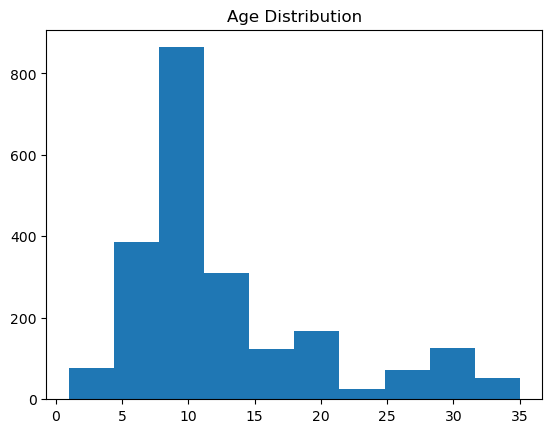

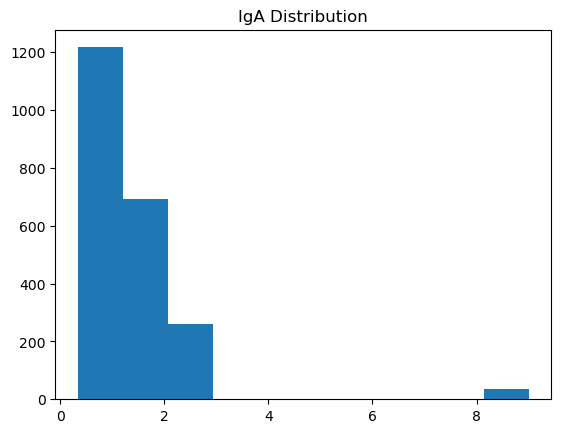

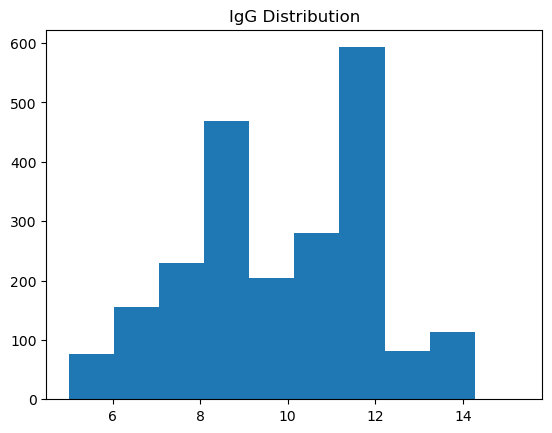

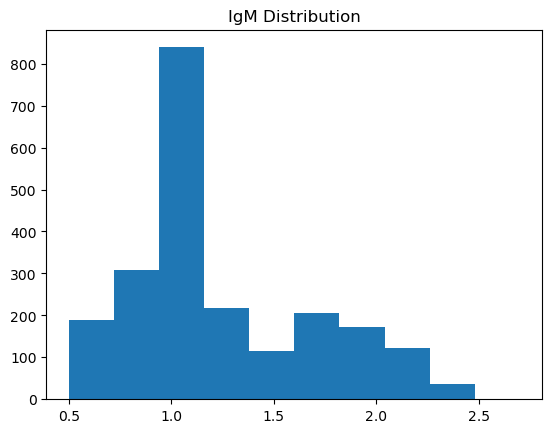

In [5]:
for i in df_num.columns:
    plt.hist(df[i])
    plt.title(i + ' Distribution')
    plt.show()

## Categorical Analysis

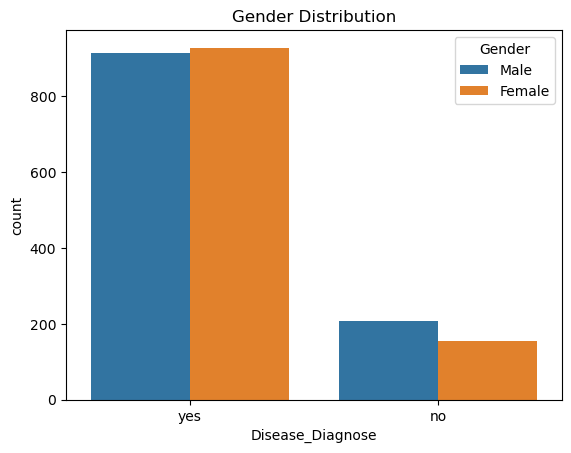

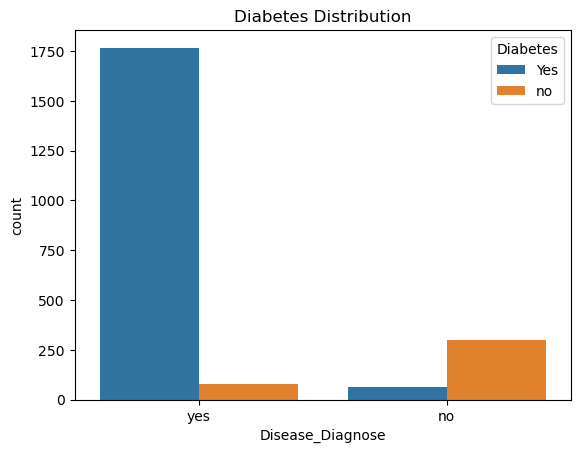

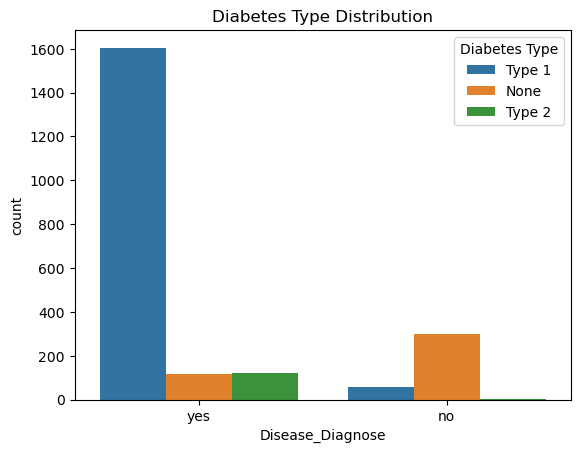

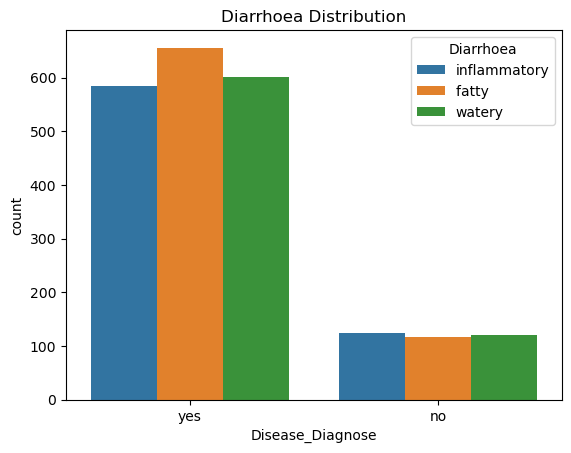

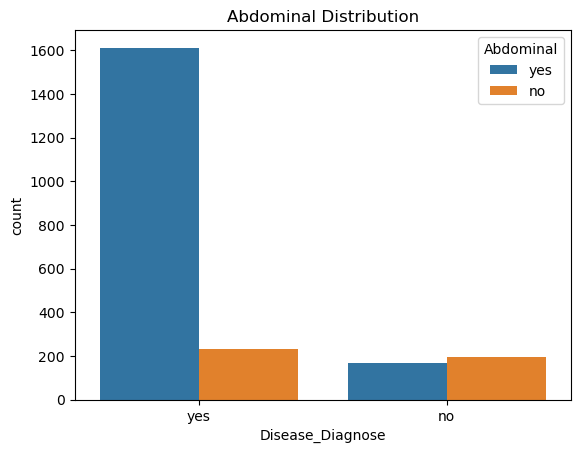

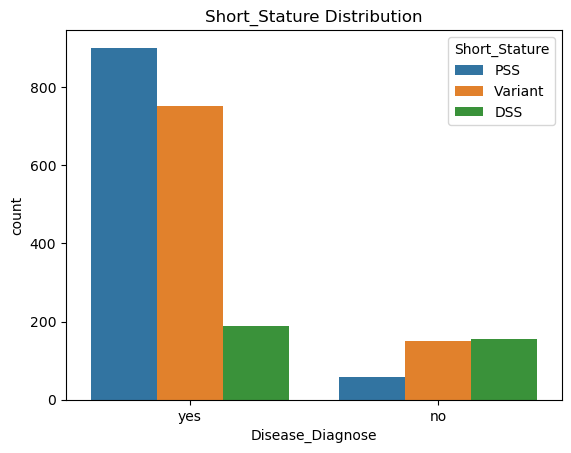

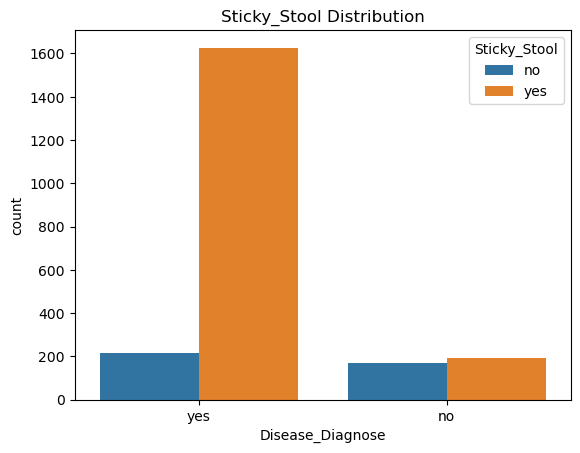

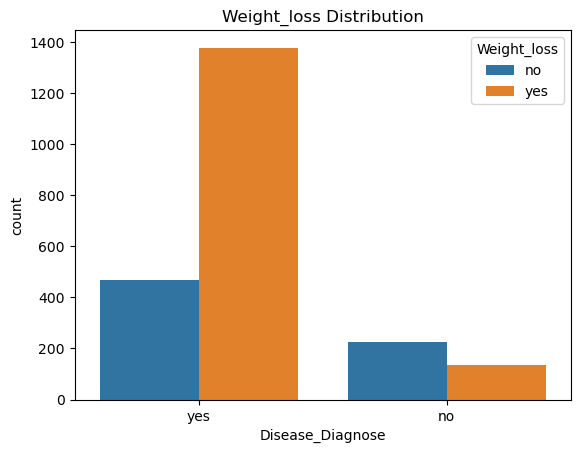

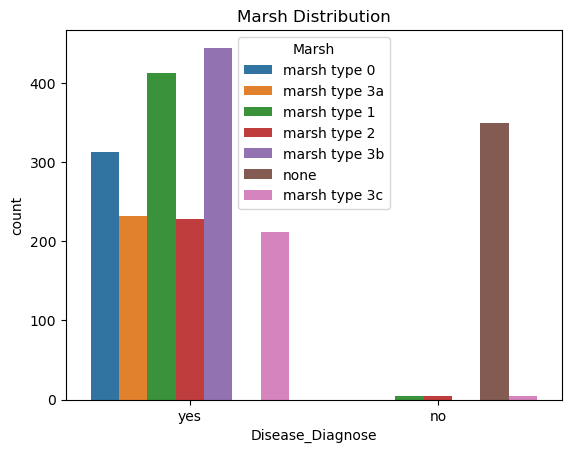

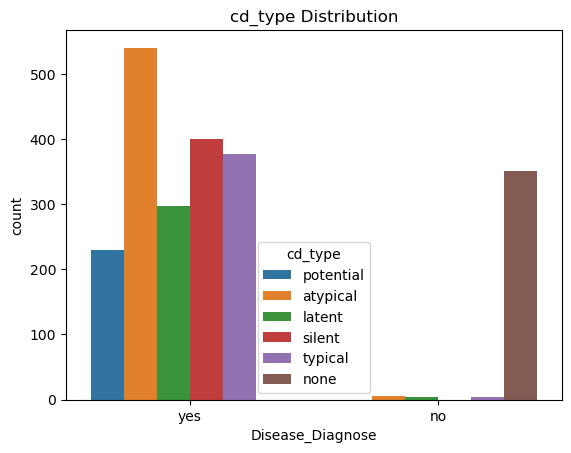

In [15]:
for i in df_cat.columns:
    sns.countplot(hue=df[i], x='Disease_Diagnose', data=df)
    plt.title(i + ' Distribution')
    plt.show()

In [6]:
df['Marsh'].iplot(kind='hist', bins=30, color='green')

# Data Preprocessing

Numerical data standardization is not necessary for logistic model fitting.

In [30]:
df['Disease_Diagnose'].replace('yes', 1, inplace=True)

In [31]:
df['Disease_Diagnose'].replace('no', 0, inplace=True)

In [32]:
df.head()

,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Marsh,cd_type,Disease_Diagnose
0,10,Male,Yes,Type 1,inflammatory,yes,PSS,no,no,1.30,10.0,1.00,marsh type 0,potential,1
1,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.50,12.5,1.30,marsh type 3a,atypical,1
2,8,Female,Yes,Type 1,watery,yes,Variant,yes,yes,0.40,8.0,0.50,marsh type 1,latent,1
3,10,Male,Yes,Type 1,watery,yes,PSS,no,no,0.98,9.0,0.66,marsh type 3a,silent,1
4,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.00,10.5,1.10,marsh type 1,latent,1


In [11]:
for i in df_cat.columns:
    print(i)

Gender
Diabetes
Diabetes Type
Diarrhoea
Abdominal
Short_Stature
Sticky_Stool
Weight_loss
Marsh
cd_type


In [33]:
df_dummies = pd.concat([pd.get_dummies(df[col]) for col in df_cat], axis=1)

In [34]:
df_dummies

,Female,Male,Yes,no,None,Type 1,Type 2,fatty,inflammatory,watery,...,marsh type 3a,marsh type 3b,marsh type 3c,none,atypical,latent,none,potential,silent,typical
0,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2202,1,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2203,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2204,1,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [35]:
df.drop([col for col in df_cat],axis=1,inplace=True)

In [36]:
df = df.join(df_dummies, how='inner')

In [37]:
df.head()

,Age,IgA,IgG,IgM,Disease_Diagnose,Female,Male,Yes,no,None,...,marsh type 3a,marsh type 3b,marsh type 3c,none,atypical,latent,none,potential,silent,typical
0,10,1.30,10.0,1.00,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,1.50,12.5,1.30,1,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,8,0.40,8.0,0.50,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,10,0.98,9.0,0.66,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,9,1.00,10.5,1.10,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Models

## Logistic Model

In [39]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Disease_Diagnose',axis=1), 
                                                    df['Disease_Diagnose'], test_size=0.30, 
                                                    random_state=101)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logmodel = LogisticRegression(solver='newton-cg')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [67]:
predictions = logmodel.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       1.00      1.00      1.00       566

    accuracy                           1.00       662
   macro avg       1.00      0.99      1.00       662
weighted avg       1.00      1.00      1.00       662

